<a href="https://colab.research.google.com/github/omobolacruise/100-Days-of-Code-Python/blob/main/free.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **import libraries**

In [4]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.graphics.gofplots import qqplot
#import scipy

### **read datasets**

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ss_df = pd.read_csv('SampleSubmission.csv')

### **perform some EDA**

In [7]:
train_df.shape

(4990, 13)

In [8]:
test_df.shape

(3532, 12)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.3+ KB


In [11]:
train_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [12]:
df = train_df.drop_duplicates(subset=['Item_Store_ID'])

In [13]:
df.shape

(4990, 13)

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4188.0,12.908838,4.703256,4.555,8.767500,12.600000,17.100000,21.350000
Item_Visibility,4990.0,0.066916,0.053058,0.000,0.027273,0.053564,0.095358,0.328391
Item_Price,4990.0,391.803796,119.378259,78.730,307.890000,393.860000,465.067500,667.220000
Store_Start_Year,4990.0,2004.783567,8.283151,1992.000,1994.000000,2006.000000,2011.000000,2016.000000
Item_Store_Returns,4990.0,6103.520164,4447.333835,83.230,2757.660000,5374.675000,8522.240000,32717.410000


In [15]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,2871.0,12.781665,4.554868,4.555,8.840000,12.600000,16.600000,21.350000
Item_Visibility,3532.0,0.065030,0.049454,0.000,0.026811,0.054444,0.094049,0.321115
Item_Price,3532.0,296.903392,181.897221,78.230,145.307500,237.770000,461.002500,667.220000
Store_Start_Year,3532.0,2004.900057,8.497250,1992.000,1994.000000,2006.000000,2011.000000,2016.000000


In [16]:
train_df.Item_Sugar_Content.value_counts()

,count
Item_Sugar_Content,
Low Sugar,3039
Normal Sugar,1773
Ultra Low Sugar,178


In [17]:
train_df.Item_Type.value_counts()

,count
Item_Type,
Snack Foods,758
Fruits and Vegetables,747
Household,567
Frozen Foods,457
Canned,376
Dairy,350
Baking Goods,344
Health and Hygiene,307
Meat,264


In [18]:
train_df.Store_Size.value_counts()

,count
Store_Size,
Medium,1582
Small,1364
High,594


In [19]:
test_df.Store_Size.value_counts()

,count
Store_Size,
Medium,1211
Small,1024
High,338


In [20]:
train_df.Store_Location_Type.value_counts()

,count
Store_Location_Type,
Cluster 3,1940
Cluster 2,1581
Cluster 1,1469


In [21]:
train_df.Store_Type.value_counts()

,count
Store_Type,
Supermarket Type1,3304
Grocery Store,724
Supermarket Type2,500
Supermarket Type3,462


### **checking for outliers**

In [22]:
def Box_plots(free):
    plt.figure(figsize=(10, 4))
    plt.title('Box Plot')
    sns.boxplot(free)
    plt.show()

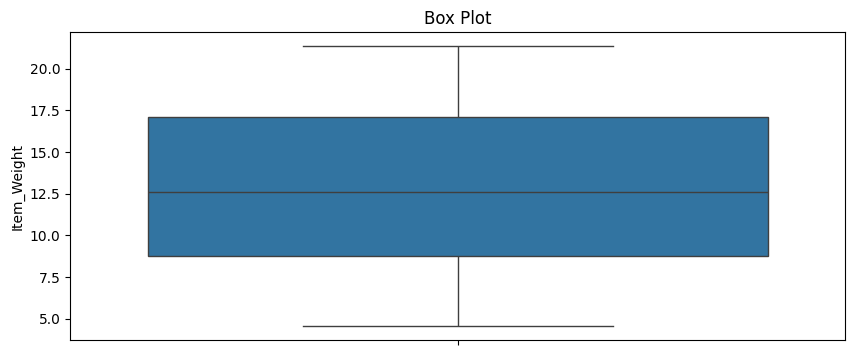

In [23]:
Box_plots(train_df['Item_Weight'])

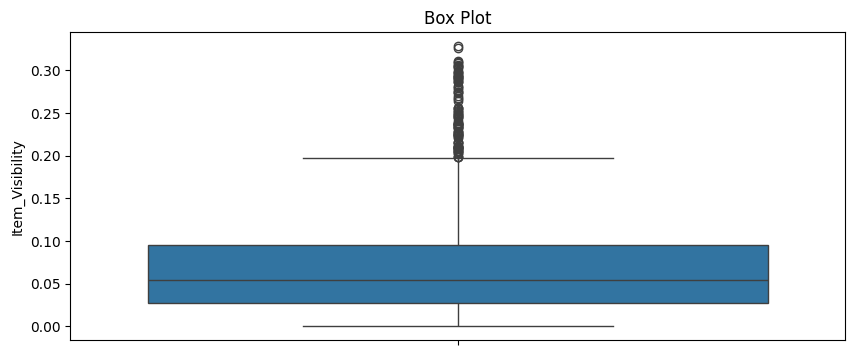

In [24]:
Box_plots(train_df['Item_Visibility'])

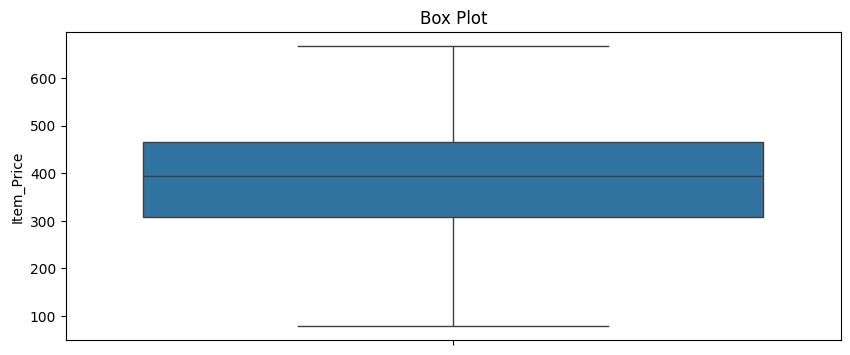

In [25]:
Box_plots(train_df['Item_Price'])

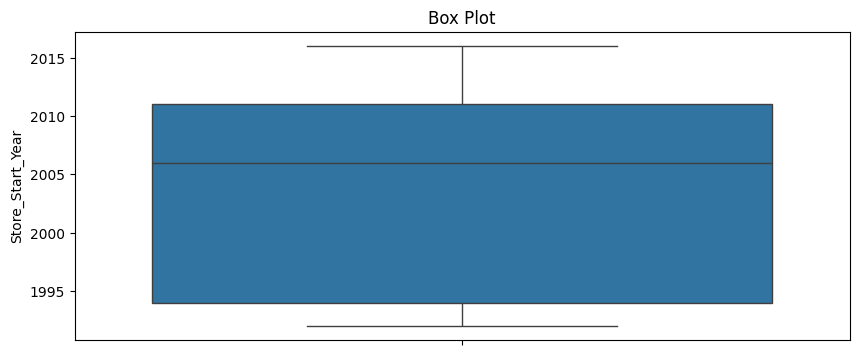

In [26]:
Box_plots(train_df['Store_Start_Year'])

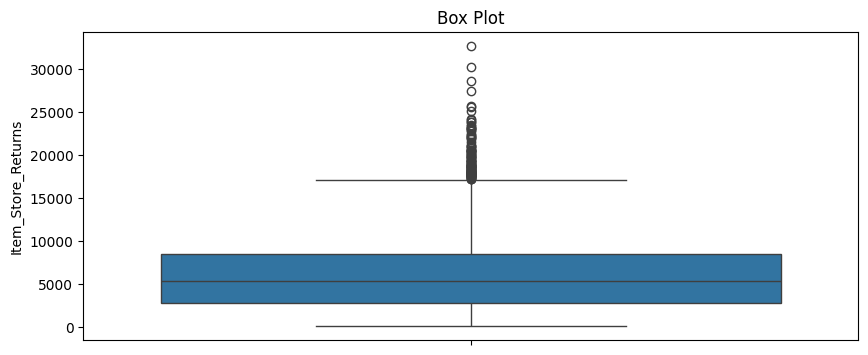

In [27]:
Box_plots(train_df['Item_Store_Returns'])

### **fill missing values**

In [28]:
train_df.Item_Weight.median()

12.6

In [29]:
train_df['Item_Weight'] = train_df.Item_Weight.fillna(train_df.Item_Weight.median())

In [30]:
test_df['Item_Weight'] = test_df.Item_Weight.fillna(train_df.Item_Weight.median())

In [31]:
train_df['Store_Size'] = train_df.Store_Size.fillna(method="bfill")

/tmp/ipython-input-31-2180434163.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['Store_Size'] = train_df.Store_Size.fillna(method="bfill")


In [32]:
test_df['Store_Size'] = test_df.Store_Size.fillna(method="bfill")

/tmp/ipython-input-32-1230688840.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df['Store_Size'] = test_df.Store_Size.fillna(method="bfill")


### **import preprocessing and data modelling packages**

In [33]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, Normalizer, FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [34]:
train_df.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [35]:
X = train_df.drop(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Store_Returns'], axis=1)
y = train_df['Item_Store_Returns']

In [36]:
X.shape

(4990, 9)

In [37]:
y.shape

(4990,)

In [38]:
test_df_1 = test_df.drop(['Item_ID', 'Store_ID', 'Item_Store_ID'], axis=1)

In [39]:
num_features = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']

In [40]:
ohe_features = ['Item_Sugar_Content', 'Store_Size', 'Store_Location_Type', 'Store_Type']

In [41]:
ord_features = ['Item_Type']

In [42]:
ord_features_1 = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

### **create a pipeline for training and testing**

In [43]:
preprocessor = ColumnTransformer(transformers=[
    ('ord_encode', OrdinalEncoder(), ord_features_1),
    #('ohe_encode', OneHotEncoder(drop='first'), ohe_features),
    ('std_scale', StandardScaler(), num_features),
    ("qt_scale", QuantileTransformer(), num_features),
    ('pt', PowerTransformer(), num_features)],
                                 remainder='passthrough')

### **split data into train and test set**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **instantiate model and pipeline**

In [45]:
linreg = LinearRegression(n_jobs=-1)

In [46]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lr_model', linreg)])

### **fit model**

In [47]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encode',
                                                  OrdinalEncoder(),
                                                  ['Item_Sugar_Content',
                                                   'Item_Type', 'Store_Size',
                                                   'Store_Location_Type',
                                                   'Store_Type']),
                                                 ('std_scale', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year']),
                                                 ('qt_scale',
                                                  QuantileTransformer(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year']),
                                                 ('pt', PowerTransformer(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year'])])),
                ('lr_model', LinearRegression(n_jobs=-1))])

### **evaluate model**

In [48]:
y_pred = pipeline.predict(X_test)

print('RMSE: {:.6f}'.format(mean_squared_error(y_test, y_pred)**0.5))

RMSE: 3104.548633


### **predict test set**

In [49]:
test_df_pred = pipeline.predict(test_df_1)

### **generate submission**

In [50]:
ss_df.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100
2,DRB01_BABATUNJI013,100
3,DRB13_BABATUNJI010,100
4,DRB13_BABATUNJI013,100


In [51]:
result = pd.DataFrame({'Item_Store_ID':ss_df.Item_Store_ID, 'Item_Store_Returns':test_df_pred})
result.to_csv("linreg_baseline_model.csv", index=False)